# Chapter 08 Exercises

## Name goes here

### Date

In [1]:
# Libraries you will need for this assignment. 
# The code below will import them for your use. 
# Please run this before continuing.
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Q1) Inflation in China and India (FRED Question)

Using the data found [Here](https://github.com/dylanjm/econ_381_development/tree/master/data) import the inflation rates for `ch08_china_inflation.csv` and `ch08_india_inflation.csv`. Ensure to use the __raw url__ for your Python code.

__(a)__: Using Python, create two time series plots showing the inflation rate for China and India for the years given in the data. 

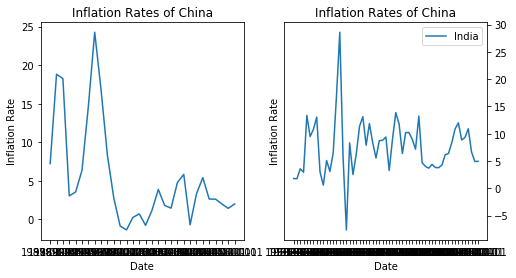

In [2]:
# Import data from China
china_url = "https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/ch08_china_inflation.csv"
china_inf = pd.read_csv(china_url,header=0, names=['Date', 'China'])

# Import data from India
india_url = "https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/ch08_india_inflation.csv"
india_inf = pd.read_csv(india_url,header=0, names=['Date', 'India'])

fig, (ax1, ax2)= plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax1.plot(china_inf.Date, china_inf.China)
ax1.set(xlabel='Date', ylabel='Inflation Rate',
       title='Inflation Rates of China')

ax2.plot(india_inf.Date, india_inf.India)
ax2.set(xlabel='Date', ylabel='Inflation Rate',
       title='Inflation Rates of China')
ax2.yaxis.tick_right()

# Would like to format ticks and x axis properly, see Ch 07 for ideas...

plt.legend() # Legends are all messed up
plt.show()

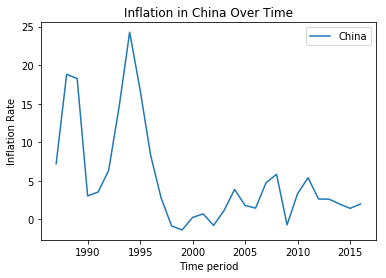

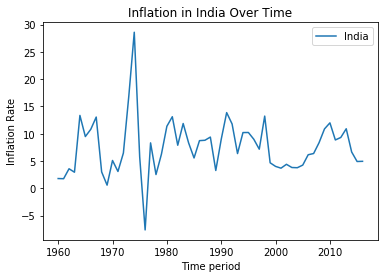

In [34]:

china_inf['Date'] = pd.to_datetime(china_inf['Date'])       # Convert the date column into a datetime object
china_inf['Year'] = china_inf['Date'].dt.year               # This will extract the year from the datetime object and store the year in a new column
china_inf.plot(x = 'Year', y = 'China', kind = 'line')      # Make a plot
plt.xlabel('Time period')
plt.title('Inflation in China Over Time')
plt.ylabel('Inflation Rate')
plt.show()


india_inf['Date'] = pd.to_datetime(india_inf['Date'])       # Convert the date column into a datetime object
india_inf['Year'] = india_inf['Date'].dt.year               # This will extract the year from the datetime object and store the year in a new column
india_inf.plot(x = 'Year', y = 'India', kind = 'line')      # Make a plot
plt.xlabel('Time period')
plt.title('Inflation in India Over Time')
plt.ylabel('Inflation Rate')
plt.show()



__(b)__: What is the average inflation rate in each country for the most recent 5 years of data? What country had lower inflation?

In [38]:
# Define a function to find the average inflation rate

def avg_inf(start, end, t):
    r=(end/start)**(1/t)-1
    return r


#india_avg_inf = avg_inf(india_inf.India[-6],india_inf.India[-1],5)
india_avg_inf = avg_inf(india_inf.India[51], india_inf.India[56], 5) 
print('Average Inflation Rate, India:', '{0:.2%}'.format(india_avg_inf))

#china_avg_inf = avg_inf(china_inf.China[-6], china_inf.China[-1], 5) 
china_avg_inf = avg_inf(china_inf.China[24], china_inf.China[29], 5) 
print('Average Inflation Rate, China:', '{0:.2%}'.format(china_avg_inf))

Average Inflation Rate, India: -11.02%
Average Inflation Rate, China: -18.05%


## Q2) Inflation and the quantity theory

Suppose velocity is contant, the growth rate of real GDP is 3% per year, and the growth rate of money is 5% per year. Calculate the long-run rate of inflation according to the quantity theory in each of the following cases:

__(a)__: What is the rate of inflation in the baseline case?

In [43]:
def inf_rate(m_growht, y_groth, v_growth = 0):
    inf = m_growth + v_growth - y_growth
    return inf
m_growth = 0.05
y_growth = 0.03

print('Inflation Rate:', '{0:.2%}'.format(inf_rate(m_growth,y_growth)))


Inflation Rate: 2.00%


__(b)__: Suppose the growth rate of money rises to 10% per year.

In [44]:
m_growth = 0.
y_growth = 0.03

print('Inflation Rate:', '{0:.2%}'.format(inf_rate(m_growth,y_growth)))

Inflation Rate: 7.00%


__(c)__: Suppose the growth rate of money rises to 100% per year and the growth rate of GDP slows to -2\%.

In [45]:
m_growth = 1
y_growth = -0.02

print('Inflation Rate:', '{0:.2%}'.format(inf_rate(m_growth,y_growth)))

Inflation Rate: 102.00%


__(d)__: Back to the baseline case, suppose real GDP growth rises to 5% per year.

In [46]:
m_growth = 0.05
y_growth = 0.05

print('Inflation Rate:', '{0:.2%}'.format(inf_rate(m_growth,y_growth)))

Inflation Rate: 0.00%


__(e)__: What if real GDP growth falls to 2% per year and the growth rate of money slows to 0\%?

In [47]:
m_growth = 0.0
y_growth = 0.02

print('Inflation Rate:', '{0:.2%}'.format(inf_rate(m_growth,y_growth)))

Inflation Rate: -2.00%


__(f)__: Return to the baseline case and suppose the velocity of money rises at 1% per year. What happens to inflation in this case? Why might velocity change this fashion?

In [48]:
m_growth = 0.05
y_growth = 0.03
v_growth = 0.01
print('Inflation Rate:', '{0:.2%}'.format(inf_rate(m_growth,y_growth, v_growth)))

Inflation Rate: 3.00%


Anything that changes how often an average dollar circulates through the economy can change the velocity of money. The advent of new technology that makes transactions happen faster might have that effect - perhaps smartphone payment systems might do the trick.

## Q3) Inflation and interest rates in Italy (FRED Question)

Using the data found [Here](https://github.com/dylanjm/econ_381_development/tree/master/data) import the data for `ch08_italy_inflation.csv` and `ch08_italy_bond.csv`. Ensure to use the __raw url__ for your Python code. 

__(a)__: Using Python, create a __single__ plot showing both the 10 year bond yields and inflation rate for Italy. Use the dates provided by the data. 

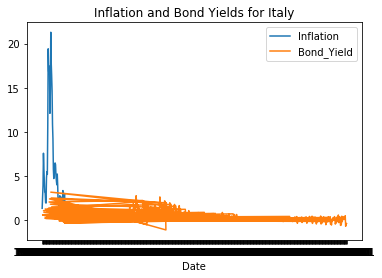

In [26]:
# Import data 
inflation_url = "https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/ch08_italy_inflation.csv"
inflation = pd.read_csv(inflation_url,header=0, names=['Date', 'Inflation'])

bond_url = "https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/CPGRLE01ITM657N.csv"
bond = pd.read_csv(bond_url,header=0, names=['Date', 'Bond_Yield'])

fig, ax = plt.subplots()

ax.plot(inflation.Date, inflation.Inflation)
ax.plot(bond.Date, bond.Bond_Yield)
ax.set(xlabel='Date', title='Inflation and Bond Yields for Italy')


plt.legend()
plt.show()

Text(0.5,0,'Time Period')

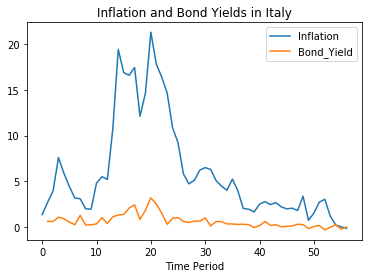

In [28]:
df3 = pd.merge(inflation, bond, on='Date', how='left')
df3
df3.plot()
plt.title('Inflation and Bond Yields in Italy')
plt.xlabel('Time Period')

__(b)__: Why do these two series tend to move together over time?

As Irving Fisher has taught us, every nominal rate of
interest contains an inflation premium. As the inflation rate
declines, so does the inflation premium.

__(c)__: What economic concept corresponds to the difference between these two series?

The vertical distance between the ten-year yield and the
inflation rate is a measure of the real rate of interest.